<a href="https://colab.research.google.com/github/Beltus/COVID-19-ENSEMBLE-MODEL-/blob/main/Ensemble_Deep_Learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Deep Learning System for the Detection of COVID-19 using Chest X-Ray Images.

# 2. Getting started

Before running into this lab, we start by running the following script from fast.ai in order to get the latest version of fastai installed and ready to use.

In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


The next steps are :

* Mounting My Google Drive (Since I got the dataset there)
* Setting my path to the dataset
* Creating a folder where we can save outputs in case of when it is needed.
* Imports from fastai

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import warnings
warnings.filterwarnings("ignore")



Mounted at /content/gdrive


In [ ]:
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Covid_dataset'

In [ ]:
from fastai.imports import *
path = Path(base_dir)
dest = path/"folder"
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
import time
start = time.time()

import numpy as np
import pandas as pd

#from fastai.vision import *
from fastai.callbacks import *

from pathlib import Path

import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import PIL

np.random.seed(10)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

# 3. Loading the data

Now we create an `ImageDataBunch` using the `from_folder` method. We chose that method since our photos have been organized such that there is a folder for each class. The folders are named after the form of the hand (i.e. 'Paper', 'Rock' and 'Scissors')

In [ ]:
#tfms = get_transforms(do_flip=True, flip_vert = True, )
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, valid_pct = 0.2)
data.classes

['covid', 'normal']

In [ ]:
??get_transforms

In [ ]:
??ImageDataBunch.from_folder


The data is as follows:

* 1328 Images in the training set
* 332 Images in the testing set

In [ ]:
data.normalize()

ImageDataBunch;

Train: LabelList (1328 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
covid,covid,covid,covid,covid
Path: /content/gdrive/My Drive/Covid_dataset;

Valid: LabelList (332 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
normal,normal,normal,normal,covid
Path: /content/gdrive/My Drive/Covid_dataset;

Test: None

We use the `show_batch` method in order to show example of images in the dataset

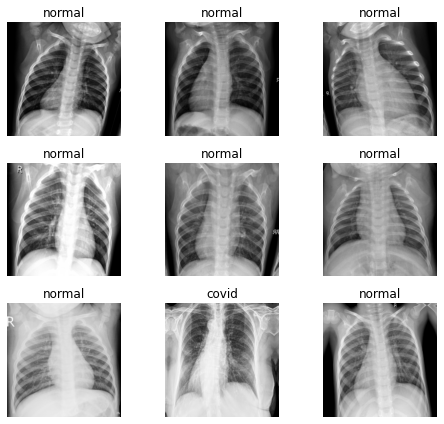

In [ ]:
import warnings
warnings.filterwarnings("ignore")
data.show_batch(rows=3, figsize=(7,6))

# 4. Training the model

Now that we got a grasp of our dataset, we will be training a model.
We will use `cnn_learner` function, a built in fastai function to load famous CNN (Convolutional Neural Network) Architectures. Basically, the functions needs the three following arguments :

* The DataBunch
* The specification of the model to be downloaded and trained (here we will use a resnet34)
* And the metric (we chose accuracy here)

We will be running the training over 10 epochs

#### Train ResNet50 Model and Plot it's graphs

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.678913,0.597650,0.771084,0.228916,08:45
1,0.442516,0.141690,0.966867,0.033133,01:14
2,0.298097,0.013876,0.993976,0.006024,01:04
3,0.215320,0.067345,0.984940,0.015060,01:04
4,0.156744,0.097691,0.987952,0.012048,01:04
5,0.122639,0.078599,0.990964,0.009036,01:05
6,0.093434,0.056947,0.984940,0.015060,01:05
7,0.070805,0.074548,0.987952,0.012048,01:05
8,0.053249,0.072049,0.987952,0.012048,01:05
9,0.053636,0.075663,0.987952,0.012048,01:05


NameError: ignored

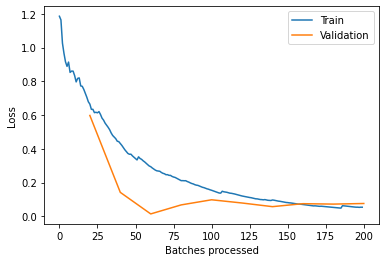

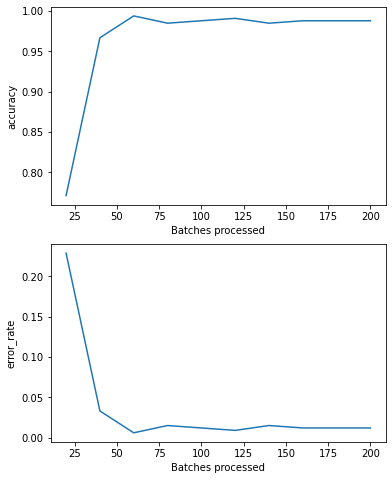

In [ ]:
learn1 = cnn_learner(data, models.resnet50, metrics=[accuracy , error_rate])

##train model
learn1.fit_one_cycle(10)

##save model to drive
learn1.save('stage-1')

##plot losses wrt to batches
learn1.recorder.plot_losses()

##plot accuracy
learn1.recorder.plot_metrics()

##compute and plot confusion matrix
interp = ClassificationInterpretation.from_learner(learner1)
interp.plot_confusion_matrix()

#get the probability of each model
probs1,targets1 = get_preds(ds_type=DatasetType.Valid)

##print the accuracy
print('Accuracy of ResNet50 is ' + str(accuracy(probs1 , targets1)))


Accuracy of ResNet50 is tensor(0.9880)


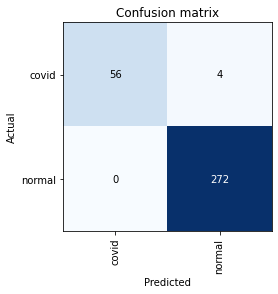

In [ ]:

#get the probability of each model
probs1,targets1 = learn1.get_preds(ds_type=DatasetType.Valid)

##print the accuracy
print('Accuracy of ResNet50 is ' + str(accuracy(probs1 , targets1)))
##compute and plot confusion matrix
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()



#### Train ResNet34 Model and Plot it's graphs and Confusion Matrix


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.904184,0.892279,0.707831,0.292169,01:00
1,0.644264,0.487399,0.795181,0.204819,01:00
2,0.428423,0.050298,0.981928,0.018072,01:00
3,0.318050,0.058461,0.990964,0.009036,01:00
4,0.221438,0.042685,0.990964,0.009036,00:59
5,0.158448,0.040013,0.990964,0.009036,00:58
6,0.121633,0.036647,0.993976,0.006024,00:59
7,0.099537,0.037445,0.993976,0.006024,01:00
8,0.076748,0.036132,0.990964,0.009036,01:00
9,0.066846,0.037000,0.993976,0.006024,01:01


Accuracy of ResNet34 is tensor(0.9940)


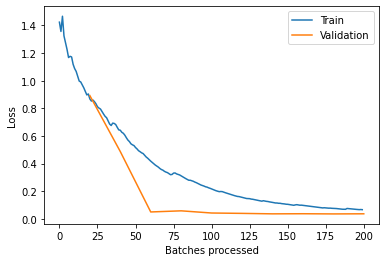

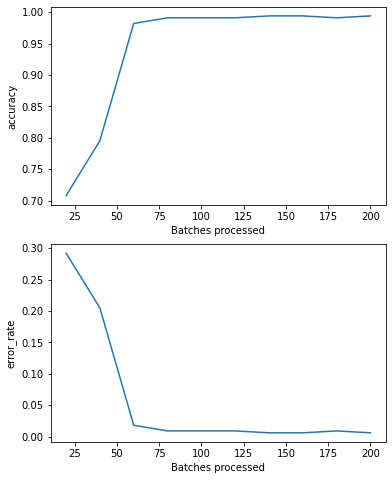

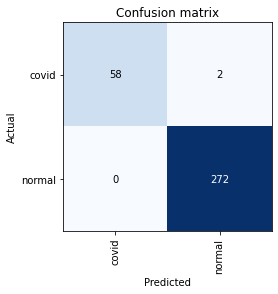

In [ ]:
learn2 = cnn_learner(data, models.resnet34, metrics=[accuracy , error_rate])

##train model
learn2.fit_one_cycle(10)

##save model to drive
learn2.save('stage-2')

##plot losses wrt to batches
learn2.recorder.plot_losses()

##plot accuracy
learn2.recorder.plot_metrics()

##compute and plot confusion matrix
interp2 = ClassificationInterpretation.from_learner(learn2)
interp2.plot_confusion_matrix()

#get the probability of each model
probs2,targets2 = learn2.get_preds(ds_type=DatasetType.Valid)

##print the accuracy
print('Accuracy of ResNet34 is ' + str(accuracy(probs2 , targets2)))


Train VGG19 Model and Plot it's graphs and Confusion Matrix

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.923701,0.322026,0.879518,0.120482,01:19
1,0.623203,0.159135,0.951807,0.048193,01:10
2,0.419579,0.074136,0.978916,0.021084,01:10
3,0.293291,0.063127,0.978916,0.021084,01:10
4,0.201500,0.045433,0.981928,0.018072,01:10
5,0.162283,0.028947,0.987952,0.012048,01:10
6,0.121747,0.054536,0.984940,0.015060,01:11
7,0.092929,0.050123,0.987952,0.012048,01:10
8,0.076535,0.045181,0.987952,0.012048,01:09
9,0.058304,0.046194,0.990964,0.009036,01:10


Accuracy of VGG-19 is tensor(0.9910)


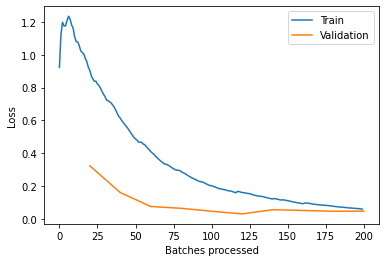

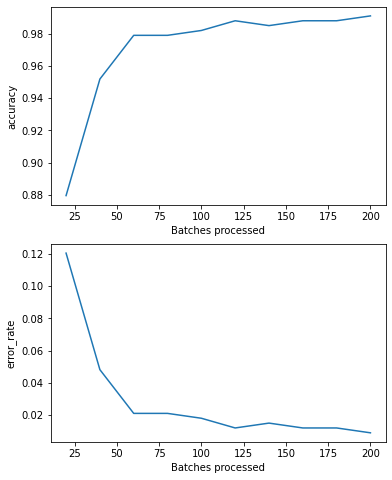

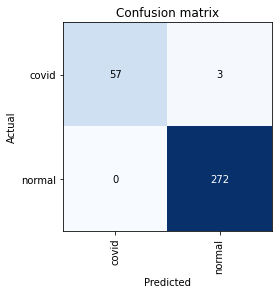

In [ ]:
learn3 = cnn_learner(data, models.vgg19_bn, metrics=[accuracy , error_rate])

##train model
learn3.fit_one_cycle(10)

##save model to drive
learn3.save('stage-3')

##plot losses wrt to batches
learn3.recorder.plot_losses()

##plot accuracy
learn3.recorder.plot_metrics()

##compute and plot confusion matrix
interp3 = ClassificationInterpretation.from_learner(learn3)
interp3.plot_confusion_matrix()

#get the probability of each model
probs3,targets3 = learn3.get_preds(ds_type=DatasetType.Valid)

##print the accuracy
print('Accuracy of VGG-19 is ' + str(accuracy(probs3, targets3)))


### Train MobileNet_V2 Model and Plot it's graphs and Confusion Matrix

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.808948,3.669324,0.225904,0.774096,01:01
1,0.519347,0.758844,0.822289,0.177711,01:00
2,0.328090,0.019616,0.993976,0.006024,01:01
3,0.218953,0.057341,0.987952,0.012048,01:00
4,0.155105,0.083663,0.987952,0.012048,01:01
5,0.121118,0.077186,0.984940,0.015060,01:01
6,0.100916,0.034451,0.987952,0.012048,01:00
7,0.079067,0.043414,0.987952,0.012048,01:00
8,0.068444,0.034532,0.987952,0.012048,01:00
9,0.050015,0.043396,0.987952,0.012048,01:00


Accuracy of ModelNet_V2 is tensor(0.9880)


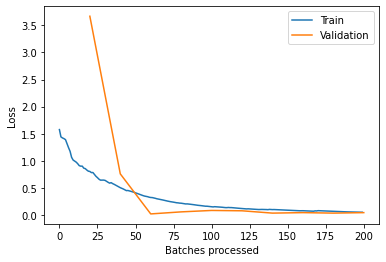

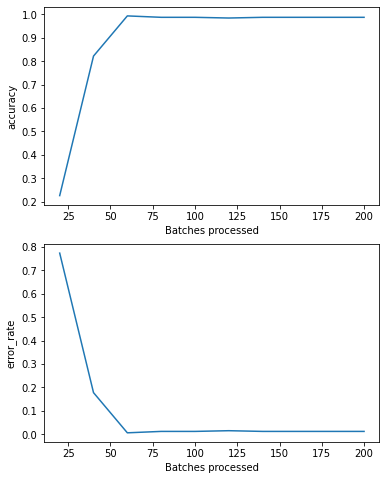

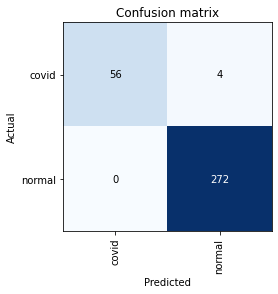

In [ ]:
learn4 = cnn_learner(data, models.mobilenet_v2, metrics=[accuracy , error_rate])

##train model
learn4.fit_one_cycle(10)

##save model to drive
learn4.save('stage-4')

##plot losses wrt to batches
learn4.recorder.plot_losses()

##plot accuracy
learn4.recorder.plot_metrics()

##compute and plot confusion matrix
interp4 = ClassificationInterpretation.from_learner(learn4)
interp4.plot_confusion_matrix()

#get the probability of each model
probs4,targets4 = learn4.get_preds(ds_type=DatasetType.Valid)

##print the accuracy
print('Accuracy of ModelNet_V2 is ' + str(accuracy(probs4, targets4)))


### Train DenseNet201 Model and Plot it's graphs and Confusion Matrix

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.593841,0.402235,0.837349,0.162651,05:01
1,0.370088,0.169156,0.936747,0.063253,01:01
2,0.224049,0.077105,0.975904,0.024096,00:57
3,0.137818,0.054919,0.987952,0.012048,00:57
4,0.091197,0.086283,0.984940,0.015060,00:56
5,0.062731,0.045926,0.993976,0.006024,00:56
6,0.044176,0.044129,0.990964,0.009036,00:56
7,0.040763,0.069545,0.990964,0.009036,00:56
8,0.039130,0.062612,0.990964,0.009036,00:55
9,0.039328,0.067133,0.990964,0.009036,00:55


Accuracy of DenseNet201 is tensor(0.9910)


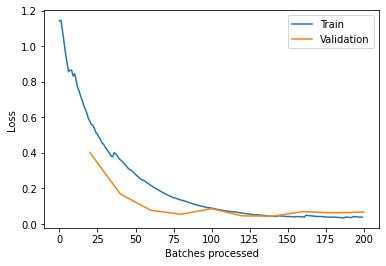

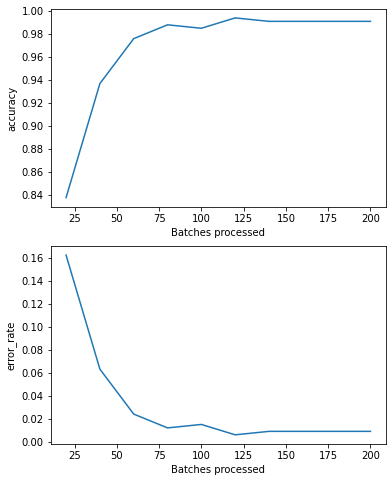

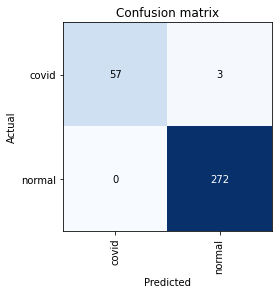

In [ ]:
learn5 = cnn_learner(data, models.densenet201, metrics=[accuracy , error_rate])

##train model
learn5.fit_one_cycle(10)

##save model to drive
learn5.save('stage-5')

##plot losses wrt to batches
learn5.recorder.plot_losses()

##plot accuracy
learn5.recorder.plot_metrics()

##compute and plot confusion matrix
interp5 = ClassificationInterpretation.from_learner(learn5)
interp5.plot_confusion_matrix()

#get the probability of each model
probs5,targets5 = learn5.get_preds(ds_type=DatasetType.Valid)

##print the accuracy
print('Accuracy of DenseNet201 is ' + str(accuracy(probs5, targets5)))


## Computing Precision, Recall(Sensitivity) and F1-Score of all the models

In [ ]:
## Load Resnet Model
learn1 = cnn_learner(data, models.resnet50, metrics=accuracy)
model1 = learn1.load('stage-1')
probs,targets = model1.get_preds(ds_type=DatasetType.Valid)

#load VGG model
learn2 = cnn_learner(data, models.vgg19_bn, metrics=accuracy)
model2 = learn2.load('stage-2')

##load AlexNet model
learn3 = cnn_learner(data, models.alexnet, metrics=accuracy)
model3 = learn3.load('stage-3')

## load mobilenet model
learn4 = cnn_learner(data, models.mobilenet_v2, metrics=accuracy)
model4 = learn4.load('stage-4')


##load densenet
learn5= cnn_learner(data, models.densenet201, metrics=accuracy)
model5 = learn5.load('stage-5')




KeyboardInterrupt: ignored

### Precision, Recall and F1-Score of ResNet

In [ ]:
## Load Resnet Model
learn1 = cnn_learner(data, models.resnet50, metrics= [accuracy, error_rate])
model1 = learn1.load('stage-1')

probs1,target1 = model1.get_preds(ds_type=DatasetType.Valid)

probs1 = np.argmax(probs1, axis=1)
correct = 0
for idx, pred in enumerate(probs1):
    if pred == target1[idx]:
        correct += 1
accuracy = correct / len(probs1)
print(len(probs1), correct, accuracy)

from sklearn.metrics import classification_report
y_true1 = target1
y_pred1 = probs1
target_names = ['Covid-19', 'No_findings']
print(classification_report(y_true1, y_pred1, target_names=target_names))

332 326 0.9819277108433735
              precision    recall  f1-score   support

    Covid-19       0.98      0.92      0.95        60
 No_findings       0.98      1.00      0.99       272

    accuracy                           0.98       332
   macro avg       0.98      0.96      0.97       332
weighted avg       0.98      0.98      0.98       332



### Precision, Recall and F1-Score of ResNet34

In [ ]:
## Load Resnet Model
learn2 = cnn_learner(data, models.resnet34, metrics= [accuracy, error_rate])
model2 = learn2.load('stage-2')

probs2,target2 = model2.get_preds(ds_type=DatasetType.Valid)

probs2 = np.argmax(probs2, axis=1)
correct = 0
for idx, pred in enumerate(probs2):
    if pred == target2[idx]:
        correct += 1
accuracy = correct / len(probs2)
print(len(probs2), correct, accuracy)

from sklearn.metrics import classification_report
y_true1 = target2
y_pred1 = probs2
target_names = ['Covid-19', 'No_Covid']
print(classification_report(y_true1, y_pred1, target_names=target_names))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


332 330 0.9939759036144579
              precision    recall  f1-score   support

    Covid-19       1.00      0.97      0.98        60
    No_Covid       0.99      1.00      1.00       272

    accuracy                           0.99       332
   macro avg       1.00      0.98      0.99       332
weighted avg       0.99      0.99      0.99       332



### Precision, Recall and F1-Score of VGG-19


In [ ]:
## Load Resnet Model
learn3 = cnn_learner(data, models.vgg19_bn, metrics= [accuracy, error_rate])
model3 = learn3.load('stage-3')

probs3,target3 = model3.get_preds(ds_type=DatasetType.Valid)

probs3 = np.argmax(probs3, axis=1)
correct = 0
for idx, pred in enumerate(probs3):
    if pred == target3[idx]:
        correct += 1
accuracy = correct / len(probs3)
print(len(probs3), correct, accuracy)

from sklearn.metrics import classification_report
y_true1 = target3
y_pred1 = probs3
target_names = ['Covid-19', 'No_findings']
print(classification_report(y_true1, y_pred1, target_names=target_names))

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


332 328 0.9879518072289156
              precision    recall  f1-score   support

    Covid-19       0.98      0.95      0.97        60
 No_findings       0.99      1.00      0.99       272

    accuracy                           0.99       332
   macro avg       0.99      0.97      0.98       332
weighted avg       0.99      0.99      0.99       332



## Precision, Recall and F1-Score of MobileNetV2

In [ ]:
## Load Resnet Model
learn4 = cnn_learner(data, models.mobilenet_v2, metrics= [accuracy, error_rate])
model4 = learn4.load('stage-4')

probs4,target4 = model4.get_preds(ds_type=DatasetType.Valid)

probs4 = np.argmax(probs4, axis=1)
correct = 0
for idx, pred in enumerate(probs4):
    if pred == target4[idx]:
        correct += 1
accuracy = correct / len(probs4)
print(len(probs4), correct, accuracy)

from sklearn.metrics import classification_report
y_true1 = target4
y_pred1 = probs4
target_names = ['Covid-19', 'No_findings']
print(classification_report(y_true1, y_pred1, target_names=target_names))

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


332 328 0.9879518072289156
              precision    recall  f1-score   support

    Covid-19       1.00      0.93      0.97        60
 No_findings       0.99      1.00      0.99       272

    accuracy                           0.99       332
   macro avg       0.99      0.97      0.98       332
weighted avg       0.99      0.99      0.99       332



### Precision, Recall and F1-Score of DenseNet201

In [ ]:
## Load Resnet Model
learn5 = cnn_learner(data, models.densenet201, metrics= [accuracy, error_rate])
model5 = learn5.load('stage-5')

probs5,target5 = model5.get_preds(ds_type=DatasetType.Valid)

probs5 = np.argmax(probs5, axis=1)
correct = 0
for idx, pred in enumerate(probs5):
    if pred == target5[idx]:
        correct += 1
accuracy = correct / len(probs5)
print(len(probs5), correct, accuracy)

from sklearn.metrics import classification_report
y_true1 = target5
y_pred1 = probs5
target_names = ['Covid-19', 'No_findings']
print(classification_report(y_true1, y_pred1, target_names=target_names))

332 329 0.9909638554216867
              precision    recall  f1-score   support

    Covid-19       1.00      0.95      0.97        60
 No_findings       0.99      1.00      0.99       272

    accuracy                           0.99       332
   macro avg       0.99      0.97      0.98       332
weighted avg       0.99      0.99      0.99       332



epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.714918,0.474900,0.849398,0.150602,00:55
1,0.446761,0.077805,0.981928,0.018072,00:55
2,0.297606,0.054195,0.984940,0.015060,00:55
3,0.205913,0.127927,0.981928,0.018072,00:56
4,0.145454,0.106251,0.978916,0.021084,00:55
5,0.127211,0.118211,0.981928,0.018072,00:55
6,0.103236,0.089221,0.981928,0.018072,00:54
7,0.074516,0.088600,0.981928,0.018072,00:54
8,0.052697,0.091058,0.981928,0.018072,00:54
9,0.041867,0.096976,0.981928,0.018072,00:54


Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.885056,0.709253,0.635542,0.364458,01:00
1,0.589593,0.392370,0.816265,0.183735,00:59
2,0.379962,0.056899,0.981928,0.018072,00:59
3,0.259577,0.038650,0.984940,0.015060,00:59
4,0.186318,0.066392,0.990964,0.009036,00:59
5,0.132104,0.054886,0.987952,0.012048,00:59
6,0.103137,0.052772,0.990964,0.009036,00:58
7,0.075754,0.060254,0.990964,0.009036,00:59
8,0.055746,0.062729,0.990964,0.009036,00:59
9,0.047793,0.064227,0.990964,0.009036,00:59


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.825299,0.090333,0.960843,0.039157,00:55
1,0.542463,0.083810,0.978916,0.021084,00:55
2,0.351169,0.052336,0.993976,0.006024,00:55
3,0.235189,0.038267,0.984940,0.015060,00:55
4,0.173368,0.015217,0.996988,0.003012,00:55
5,0.134672,0.018279,0.993976,0.006024,00:55
6,0.105016,0.038120,0.990964,0.009036,00:55
7,0.085342,0.017957,0.990964,0.009036,00:55
8,0.068100,0.018361,0.990964,0.009036,00:55
9,0.058484,0.016560,0.990964,0.009036,00:55


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.690322,2.189389,0.355422,0.644578,00:56
1,0.465991,0.665001,0.861446,0.138554,00:56
2,0.289517,0.034629,0.987952,0.012048,00:56
3,0.198160,0.041237,0.987952,0.012048,00:55
4,0.150812,0.036059,0.990964,0.009036,00:56
5,0.105086,0.023304,0.993976,0.006024,00:56
6,0.078834,0.036942,0.984940,0.015060,00:56
7,0.059444,0.023609,0.990964,0.009036,00:57
8,0.049060,0.028319,0.984940,0.015060,00:56
9,0.053343,0.029859,0.987952,0.012048,00:56


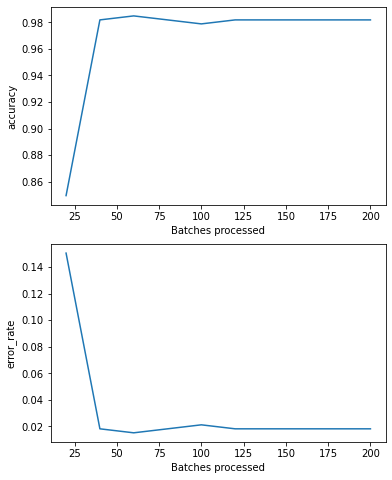

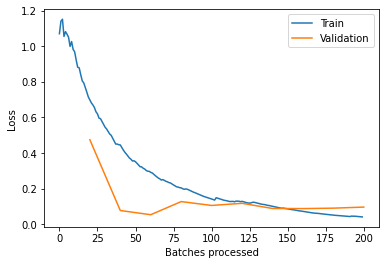

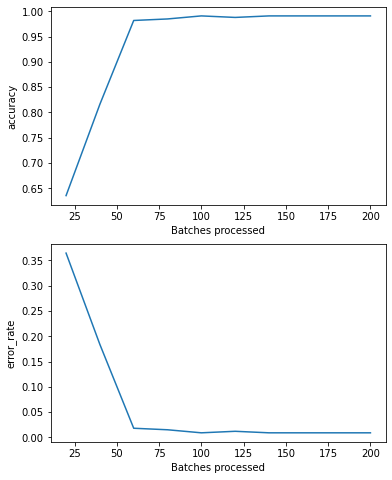

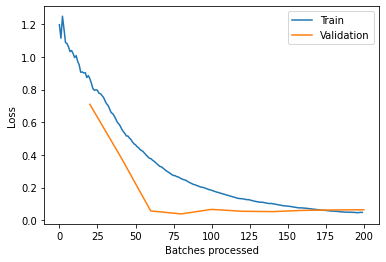

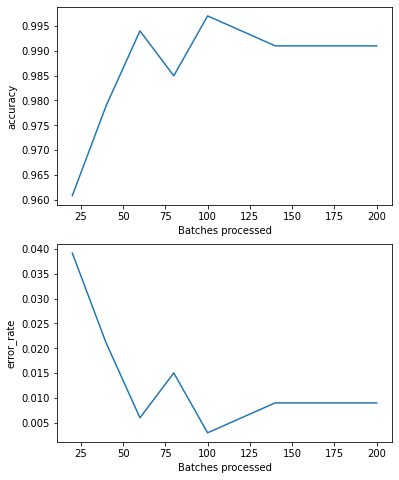

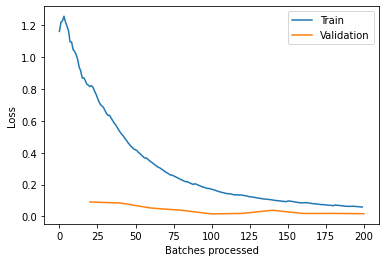

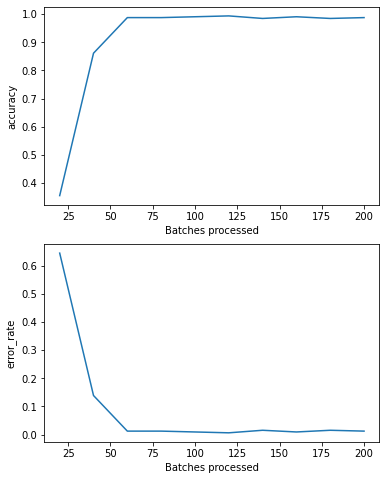

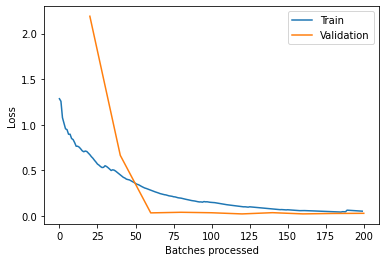

In [ ]:
models = [models.resnet50, models.vgg19_bn, models.alexnet, models.mobilenet_v2]

ens_list = []

for i , model in enumerate(models):
  #download and load model
    learn = cnn_learner(data, model, metrics=[accuracy , error_rate])
    learn.fit_one_cycle(10)
    learn.save('stage-' + str(i+1))
    learn.recorder.plot_metrics()
    learn.recorder.plot_losses()
    ens_list.append(learn)


In [ ]:
#'

## Additional Model


In [ ]:
#download and load model
##https://forums.fast.ai/t/load-model-from-pth-file/37440
learn= cnn_learner(data, models.densenet201, metrics=accuracy)
#train resnet model
learn.fit_one_cycle(10)

learn.save('stage-5')

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: ignored

## Training tof ResNet34 Model

## Load all the Saved Models



In [ ]:
#download and load model
##https://forums.fast.ai/t/load-model-from-pth-file/37440
learn= cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])
#train resnet model
learn.fit_one_cycle(3)

#learn.save('stage-6')

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.723631,0.991091,0.623494,0.376506,00:53
1,0.438778,0.334348,0.900602,0.099398,00:54
2,0.289508,0.058725,0.987952,0.012048,00:54


## Plotting the Metrics of Models

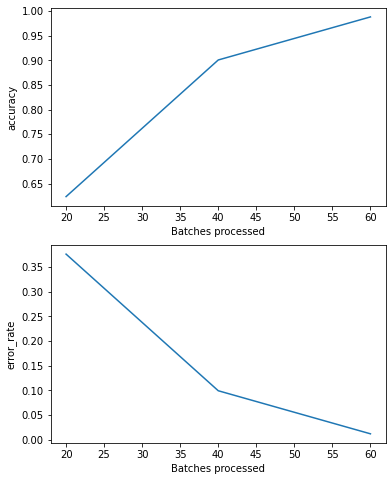

In [ ]:
learn.recorder.plot_metrics()


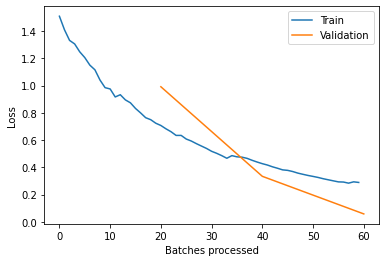

In [ ]:
learn.recorder.plot_losses()


In [ ]:
## Load Resnet Model
learn1 = cnn_learner(data, models.resnet50, metrics=accuracy)
model1 = learn1.load('stage-1')
model1.recorder.plot_metrics()



AttributeError: ignored

In [ ]:
## Load Resnet Model
learn1 = cnn_learner(data, models.resnet50, metrics=accuracy)
model1 = learn1.load('stage-1')
probs,targets = ens_list[i].get_preds(ds_type=DatasetType.Valid)

#load VGG model
learn2 = cnn_learner(data, models.vgg19_bn, metrics=accuracy)
model2 = learn2.load('stage-2')

##load AlexNet model
learn3 = cnn_learner(data, models.alexnet, metrics=accuracy)
model3 = learn3.load('stage-3')

## load mobilenet model
learn4 = cnn_learner(data, models.mobilenet_v2, metrics=accuracy)
model4 = learn4.load('stage-4')


##load densenet
learn5= cnn_learner(data, models.densenet201, metrics=accuracy)
model5 = learn5.load('stage-5')




## Model Prediction  +  Ensemble Learning


In [ ]:
#create list of models
ens_list = [model1, model2, model3, model4, model5]
#create list of predicted probability list of each model
probList = []

#iterate through each each model
for i in range(len(ens_list)):

    #run prediction on each model  
    probs,targets = ens_list[i].get_preds(ds_type=DatasetType.Valid)
    #tensorlist of indices of maximum probabilities
    probs = np.argmax(probs, axis=1)

    #create numpy list of predicted probabilities
    probList.append(probs.tolist())
   # nprobs = []

print(len(probList))
print(probList[0])
print(probList[1])
print(probList[2])
print(probList[3])
print(probList[4])



#probList[1].tolist()

5
[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
[

In [ ]:

print(len(probList[1]))

332


## Ensemble all the models 


In [ ]:
from statistics import mode

#final_pred = np.array([])

final_pred = []
for i in range(len(probList[1])):
  #final_pred = np.append(final_pred, mode([probs_list[0][i],probs_list[1][i],probs_list[2][i]
  final_pred.append(mode([probList[0][i],probList[1][i],probList[2][i], probList[4][i]]))

  #convert list to pytorch tensor vector
  #probs = torch.tensor(final_pred)


#print(set(final_pred).intersection(set(final)))
#print(final_pred)
#print(final)
print(probs)

tensor([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

# Compute Accuracy of Ensemble Model

In [ ]:

pred = final_pred # list of indices of predicted labels from the ensemble model
targ = targets.tolist()  # list of indices of true targets

#compute accuracy
acc = sum(1 for x,y in zip(pred,targ) if x == y) / len(targ) 
#print
print('Accuracy of Ensemble Model is ' + str(acc))

Accuracy of Ensemble Model is 0.9909638554216867


## Accuaracy of the Individual Models

In [ ]:

    #get the probability of each model
probs0,targets0 = ens_list[0].get_preds(ds_type=DatasetType.Valid)
print('Accuracy of ResNet50 is ' + str(accuracy(probs0 , targets0)))

    #get the probability of each model
probs1,targets1 = ens_list[1].get_preds(ds_type=DatasetType.Valid)
print('Accuracy of VGG is ' + str(accuracy(probs1 , targets1)))

    #get the probability of each model
probs2,targets2 = ens_list[2].get_preds(ds_type=DatasetType.Valid)
print('Accuracy of AlexNet is ' + str(accuracy(probs2 , targets2)))

    #get the probability of each model
probs3,targets3 = ens_list[3].get_preds(ds_type=DatasetType.Valid)
print('Accuracy of Mobile_Net is ' + str(accuracy(probs3 , targets3)))


    #get the probability of each model
probs4,targets4 = ens_list[4].get_preds(ds_type=DatasetType.Valid)
print('Accuracy of DenseNet is ' + str(accuracy(probs4 , targets4)))

Accuracy of ResNet50 is tensor(0.9500)


Accuracy of VGG is tensor(0.9000)


Accuracy of AlexNet is tensor(1.)


Accuracy of Mobile_Net is tensor(0.9500)


Accuracy of DenseNet is tensor(0.8500)


## Confusion Matrix of Individual Models

In [ ]:
interp = ClassificationInterpretation.from_learner(ens_list[0])
interp1 = ClassificationInterpretation.from_learner(ens_list[1])
interp2 = ClassificationInterpretation.from_learner(ens_list[2])
interp3 = ClassificationInterpretation.from_learner(ens_list[3])
interp4 = ClassificationInterpretation.from_learner(ens_list[4])

## Plot the Confusion Matrix

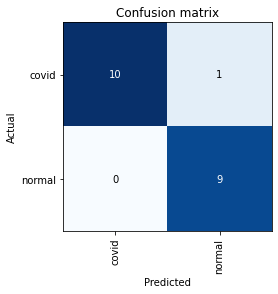

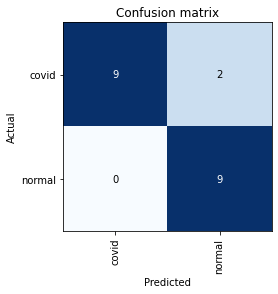

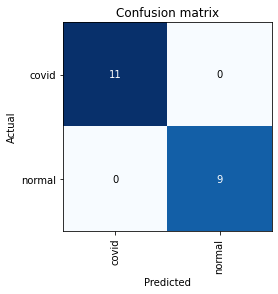

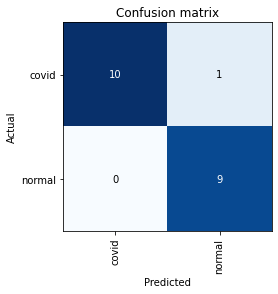

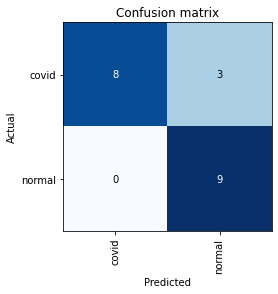

In [ ]:

interp.plot_confusion_matrix()
interp1.plot_confusion_matrix()
interp2.plot_confusion_matrix()
interp3.plot_confusion_matrix()
interp4.plot_confusion_matrix()

In [ ]:
from statistics import mode

#final_pred = np.array([])

final_pred = []
for i in range(20):
  #final_pred = np.append(final_pred, mode([probs_list[0][i],probs_list[1][i],probs_list[2][i]
  final_pred.append(mode([probs_list[0][i],probs_list[1][i],probs_list[2][i]]))



In [ ]:
probs = np.argmax(probs, axis=1)
correct = 0
for idx, pred in enumerate(probs):
    if pred == targets[idx]:
      print('yes')


AxisError: ignored

In [ ]:
# The predictions are then averaged.
n_aug = 12
probs = np.argmax(probs, axis=1)
preds_n_avg = np.zeros((len(probs),2))
for n in tqdm_notebook(range(n_aug), 'Running TTA...'):
    preds,y = ens_list[0].get_preds(ds_type=DatasetType.Test, with_loss=False)
    preds_n_avg = np.sum([preds_n_avg, preds.numpy()], axis=0)
preds_n_avg = preds_n_avg / n_aug

AxisError: ignored

In [ ]:
final_pred = []
for i in range(20):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

NameError: ignored

In [ ]:
probs = np.argmax(probs, axis=1)
correct = 0
for idx, pred in enumerate(probs):
    if pred == targets[idx]:
      print('yes')


AxisError: ignored

In [ ]:
#download and load model
learn1 = cnn_learner(data, models.resnet50, metrics=accuracy)

#train resnet model
learn1.fit_one_cycle(10)


epoch,train_loss,valid_loss,accuracy,time
0,1.426562,0.830905,0.500000,00:10
1,1.153049,2.639604,0.500000,00:01
2,0.810937,3.302086,0.500000,00:01
3,0.616035,2.429584,0.600000,00:01
4,0.496098,1.681178,0.700000,00:01
5,0.435730,1.042206,0.800000,00:01
6,0.371460,0.638733,0.850000,00:01
7,0.340501,0.406701,0.950000,00:01
8,0.305848,0.314619,0.950000,00:01
9,0.286796,0.255123,0.950000,00:01


In [ ]:
learn2 = cnn_learner(data, models.vgg19_bn, metrics=accuracy)
learn2.fit_one_cycle(10)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.595708,0.944248,0.450000,00:07
1,1.384809,1.060117,0.450000,00:01
2,1.081358,1.300762,0.450000,00:01
3,0.830606,1.357590,0.450000,00:02
4,0.712955,1.125446,0.550000,00:01
5,0.615241,0.900200,0.650000,00:01
6,0.543273,0.701433,0.800000,00:01
7,0.487959,0.576131,0.800000,00:01
8,0.440266,0.443235,0.800000,00:01
9,0.404310,0.370479,0.800000,00:01


In [ ]:
learn3 = cnn_learner(data, models.alexnet, metrics=accuracy)
learn3.fit_one_cycle(10)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.208382,1.316098,0.600000,00:01
1,1.161542,0.356604,0.850000,00:01
2,0.984491,0.727003,0.600000,00:01
3,0.824992,1.059528,0.600000,00:01
4,0.683487,1.009574,0.650000,00:01
5,0.578357,0.694381,0.750000,00:01
6,0.491402,0.463852,0.800000,00:01
7,0.431403,0.319724,0.900000,00:01
8,0.382272,0.201234,0.950000,00:01
9,0.342196,0.142295,0.950000,00:01


In [ ]:
learn4 = cnn_learner(data, models.mobilenet_v2, metrics=accuracy)
learn4.fit_one_cycle(10)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.185505,2.080190,0.500000,00:01
1,0.901852,1.029552,0.550000,00:01
2,0.705008,2.069873,0.450000,00:01
3,0.551012,2.224803,0.500000,00:01
4,0.436787,1.889661,0.700000,00:01
5,0.361915,1.401349,0.800000,00:01
6,0.313122,0.855358,0.850000,00:01
7,0.273373,0.423974,0.850000,00:01
8,0.245636,0.221322,0.950000,00:01
9,0.219782,0.106909,0.950000,00:01


In [ ]:
learn5 = cnn_learner(data, models.densenet161, metrics=accuracy)
learn5.fit_one_cycle(10)

AttributeError: ignored

The model is then saved and given a name (`stage-1`) that can be used to load it later.

**P.S.** : Note that we only did finetuning (i.e. we trained the last dense layers only)

In [ ]:
learn.save('stage-1')

In [ ]:
learn5.summary

## Ensemble  Learning in Action

In [ ]:
##print number of validation image samples
print("Number of examples in testing:", len(data.valid_ds))

probs,targets = learn1.get_preds(ds_type=DatasetType.Valid)



Number of examples in testing: 20


RuntimeError: ignored

In [ ]:
## Ensemble Learning in Action
#!pip install deepstack==0.0.9
#from deepstack.base import KerasMember
nmodels = 5

##ensemble list of models
def get_ensemble(nmodels):
    ens_model = [] # Empty List of ensemble model, I will store the trained learner object here 
    learning_rate =[2.95e-02,3e-02,3e-02] # List of learning rate for each model 
    model_list = [models.resnet50, models.vgg19_bn, models.alexnet, models.mobilnet_v2, models.densenet201] ##List of Models . You can add resnet ones in the mix
    for i in range(nmodels):

        print(f'-----Training model: {i+1}--------')
             
        learn_resnet = cnn_learner(data, model_list[i], metrics=[error_rate, accuracy,AUROC()], model_dir="/tmp/model/")

        print('training for 128x128')
        learn_resnet.set_data = train_data(128,64) # Train the model for imagesize 128
        learn_resnet.lr_find()
        learn_resnet.recorder.plot(suggestion=True)
        learn_resnet.fit_one_cycle(3,slice(learning_rate[i])) # using the learning rate for the first model 
        
        print('training for 150x150')
        learn_resnet.set_data = train_data(150,96) #Train the model for imagesize 150
        learn_resnet.fit_one_cycle(3,slice(learning_rate[i]))   # using the learning rate assigned for the first model   
        
        learn_resnet.save(f'ensem_model_{i}.weights')
        ens_model.append(learn_resnet)
        print(f'-----Training of model {i+1} complete----')
    return ens_model

print(len(models))



NameError: ignored

In [ ]:
import keras
from keras.utils.data_utils import get_file
import numpy as np

In [ ]:
from deepstack.base import KerasMember

member1 = KerasMember(name="model1", keras_model=model1, train_batches=(x_train, y_train), val_batches=(x_val, y_val))
member2 = KerasMember(name="model2", keras_model=model2, train_batches=(x_train, y_train), val_batches=(x_val, y_val))
member3 = KerasMember(name="model3", keras_model=model3, train_batches=(x_train, y_train), val_batches=(x_val, y_val))
member4 = KerasMember(name="model4", keras_model=model4, train_batches=(x_train, y_train), val_batches=(x_val, y_val)

# 5. Interpreting the Model

Despite what people say, Deep Learning models are easy to interpret. Fastai is well equipped for this.

In the interpretation phase :

* We plot the validation data samples for which we have the highest loss values (i.e. the samples for which the model predicted a very low probability of the image belonging to its actual class)
* We plot a confusion matrix

In [ ]:
interp = ClassificationInterpretation.from_learner(learn5)

In [ ]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

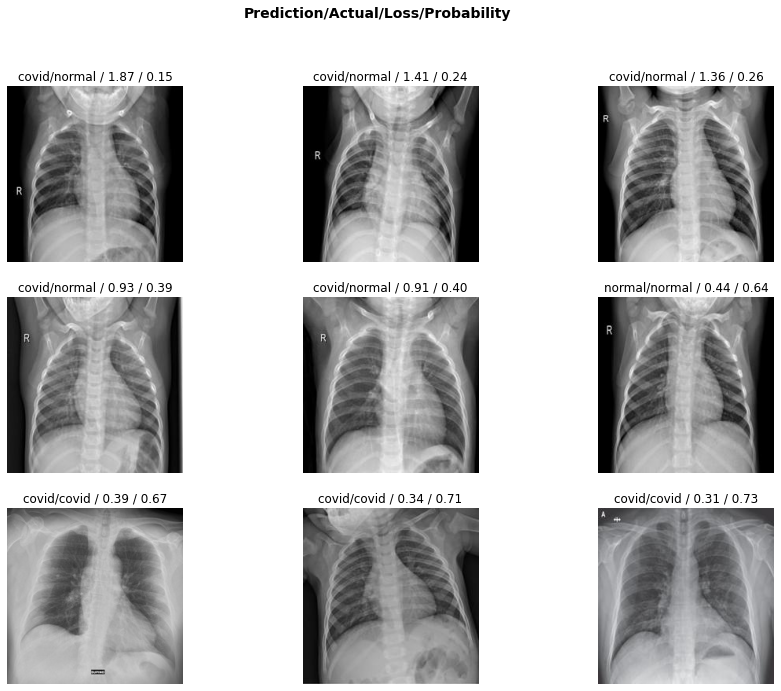

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

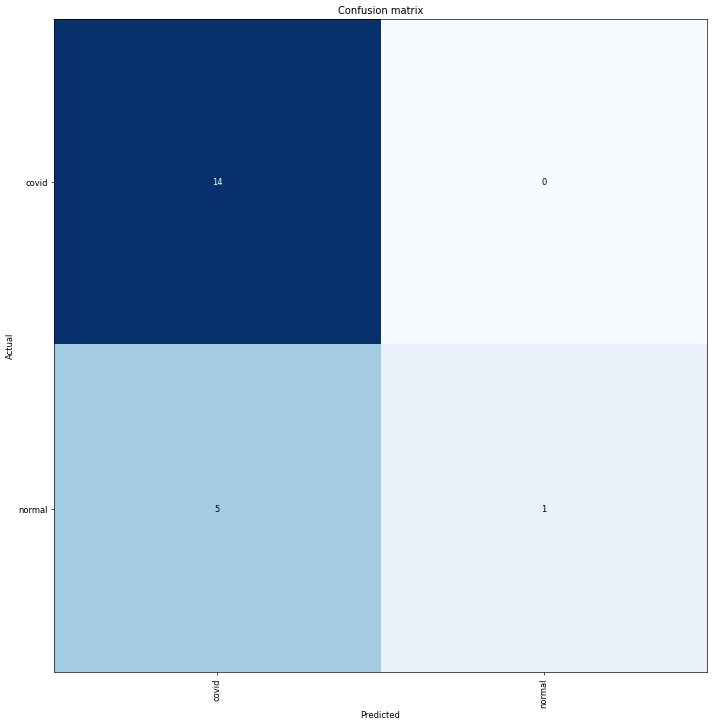

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# 6. Making predictions on random hand pictures from the internet

In [ ]:
pred_path = Path(base_dir + '/random_hand_images')

In [ ]:
il = ImageList.from_folder(pred_path); il

ImageList (4 items)
Image (3, 1280, 1920),Image (3, 651, 960),Image (3, 910, 910),Image (3, 250, 202)
Path: /content/gdrive/My Drive/VALDOM/PHOTO_MAIN_VALDOM/random_hand_images

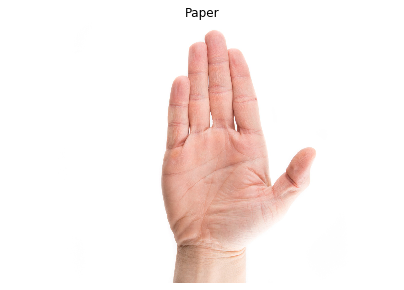

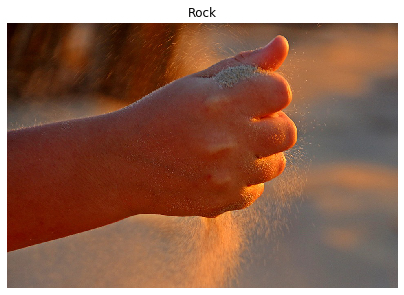

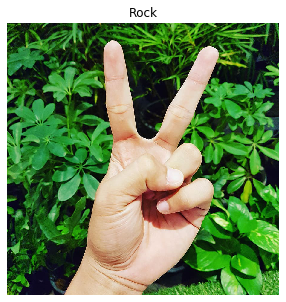

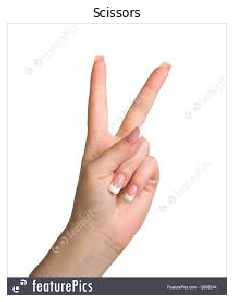

In [ ]:
for img in il:
  prediction = learn.predict(img)
  img.show(figsize=(7,5), title = str(prediction[0]))